# Project: Soccer Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>    
</ul>

<a id='intro'></a>
## Introduction

This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.

For this project, I firstly cleaned the data(removing null values and duplicate values) in a seperate notebook before importing it to MySQL for joining different columns and tables together including further analysis. After the analysis using SQL, I exported the datasets to `csv` files to use for nalysis in this notebook.

In this project, I'll be exploring the various datasets I have created from SQL after I was done with the analysis there.

In [1]:
# import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette='muted')
import warnings
warnings.filterwarnings(action='ignore')

<a id='wrangling'></a>
## Data Wrangling

### Lets explore the matches played over the course of that time(2008-2016)

In [2]:
matches = pd.read_csv('match_list.csv', names=['game_id', 'country', 'country_id', 'league', 'season', 'stage', 
                                               'date', 'home', 'home_goal', 'away', 'away_goal'])
matches.head()

,game_id,country,country_id,league,season,stage,date,home,home_goal,away,away_goal
0,1,Belgium,1,Belgium Jupiler League,2008/2009,1,17/08/2008,KRC Genk,1,Beerschot AC,1
1,2,Belgium,1,Belgium Jupiler League,2008/2009,1,16/08/2008,SV Zulte-Waregem,0,Sporting Lokeren,0
2,3,Belgium,1,Belgium Jupiler League,2008/2009,1,16/08/2008,KSV Cercle Brugge,0,RSC Anderlecht,3
3,4,Belgium,1,Belgium Jupiler League,2008/2009,1,17/08/2008,KAA Gent,5,RAEC Mons,0
4,5,Belgium,1,Belgium Jupiler League,2008/2009,1,16/08/2008,NaN,1,Standard de Liège,3


Now, lets have an overview of the dataset

In [3]:
print(matches.shape)
matches.info()

(25979, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   game_id     25979 non-null  int64 
 1   country     25979 non-null  object
 2   country_id  25979 non-null  int64 
 3   league      25979 non-null  object
 4   season      25979 non-null  object
 5   stage       25979 non-null  int64 
 6   date        25979 non-null  object
 7   home        25801 non-null  object
 8   home_goal   25979 non-null  int64 
 9   away        25801 non-null  object
 10  away_goal   25979 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 2.2+ MB


In [4]:
matches.describe()

,game_id,country_id,stage,home_goal,away_goal
count,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000
mean,12990.000000,11738.630317,18.242773,1.544594,1.160938
std,7499.635658,7553.936759,10.407354,1.297158,1.142110
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6495.500000,4769.000000,9.000000,1.000000,0.000000
50%,12990.000000,10257.000000,18.000000,1.000000,1.000000
75%,19484.500000,17642.000000,27.000000,2.000000,2.000000
max,25979.000000,24558.000000,38.000000,10.000000,9.000000


In [5]:
# checking for nulls in the dataset
print('checking for null values')
null = matches.isnull().sum().sort_values(ascending=False)
n1 = matches.isnull().sum()/matches.isnull().count()*100
n2 = (np.round(n1, 1)).sort_values(ascending=False)
missing_val = pd.concat([null, n2], axis=1, keys=['Total', '%'])
missing_val

checking for null values


,Total,%
home,178,0.7
away,178,0.7
game_id,0,0.0
country,0,0.0
country_id,0,0.0
league,0,0.0
season,0,0.0
stage,0,0.0
date,0,0.0
home_goal,0,0.0


I'll be dropping the null values

In [6]:
# drop all null values since there's no info about missing teams
matches.dropna(inplace=True)

In [7]:
# check for duplicates
matches.duplicated().sum()

0

In [8]:
#confirm null values are gone
matches.isnull().sum().sum()

0

Now, I'll move on to further analysis of the dataset to get information about the team, goals scored and more

In [9]:
#average goals scored by teams at their home stadium across each season
matches.groupby('season')['home_goal'].mean()

season
2008/2009    1.500000
2009/2010    1.541176
2010/2011    1.549536
2011/2012    1.573981
2012/2013    1.550000
2013/2014    1.578826
2014/2015    1.520301
2015/2016    1.543206
Name: home_goal, dtype: float64

Text(0, 0.5, 'average goals')

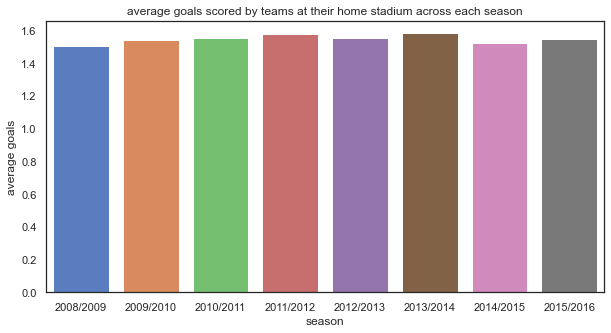

In [140]:
x = matches.groupby('season')['home_goal'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x.index, x.values)
plt.title('average goals scored by teams at their home stadium across each season')
plt.xlabel('season')
plt.ylabel('average goals')

In [141]:
#total goals scored by teams at their home stadium across each season
matches.groupby('season')['home_goal'].sum()

season
2008/2009    4752
2009/2010    4978
2010/2011    5005
2011/2012    5021
2012/2013    5053
2013/2014    4787
2014/2015    5055
2015/2016    4929
Name: home_goal, dtype: int64

Text(0, 0.5, 'goals')

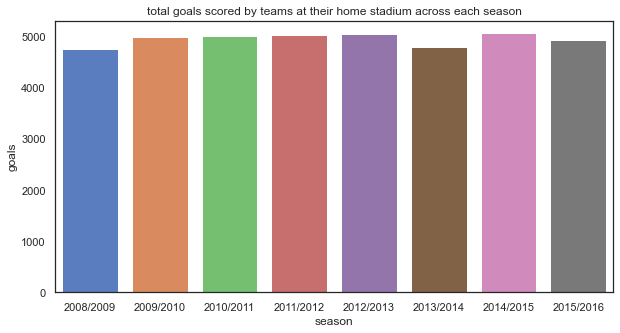

In [10]:
x = matches.groupby('season')['home_goal'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x.index, x.values)
plt.title('total goals scored by teams at their home stadium across each season')
plt.xlabel('season')
plt.ylabel('goals')

`5055` home team goals were scored in 2014/2015, the highest of any season

In [12]:
# highest scoring home teams
matches['home_goal'].max()
matches.query('home_goal == 10')

,game_id,country,country_id,league,season,stage,date,home,home_goal,away,away_goal
8256,13899,Netherlands,13274,Netherlands Eredivisie,2010/2011,10,24/10/2010,PSV,10,Feyenoord,0
25687,24248,Spain,21518,Spain LIGA BBVA,2015/2016,16,20/12/2015,Real Madrid CF,10,Rayo Vallecano,2


`Real Madrid CF` and `PSV` recorded the highest number of goals scored by a home team from 2008-2016 demolishing Rayo Vallecano and Feyenoord in this period.

In [13]:
# highest scoring away teams
matches['away_goal'].max()
matches.query('away_goal == 9')

,game_id,country,country_id,league,season,stage,date,home,home_goal,away,away_goal
23327,7661,France,4769,France Ligue 1,2015/2016,30,13/03/2016,ES Troyes AC,0,Paris Saint-Germain,9


`Paris Saint-Germain` recorded the highest number of goals scored by an away team from 2008-2016 after humiliating ES Troyes AC in 2016.

### Lets explore the goals scored by team per season, league and country

In [14]:
home_away = pd.read_csv('homeandaway_goals.csv', names=['country', 'league', 'team', 'season', 'home_goals', 'away_goals'])
home_away.head()

,country,league,team,season,home_goals,away_goals
0,Belgium,Belgium Jupiler League,NaN,2008/2009,43,56
1,Netherlands,Netherlands Eredivisie,NaN,2008/2009,27,27
2,Poland,Poland Ekstraklasa,NaN,2015/2016,21,19
3,Portugal,Portugal Liga ZON Sagres,NaN,2011/2012,13,19
4,Portugal,Portugal Liga ZON Sagres,NaN,2015/2016,34,43


Now, lets have an overview of the dataset

In [15]:
print(home_away.shape)
home_away.info()

(1475, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     1475 non-null   object
 1   league      1475 non-null   object
 2   team        1467 non-null   object
 3   season      1475 non-null   object
 4   home_goals  1475 non-null   int64 
 5   away_goals  1475 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 69.3+ KB


In [16]:
home_away.describe()

,home_goals,away_goals
count,1475.000000,1475.000000
mean,27.204746,20.447458
std,9.681921,6.820766
min,3.000000,1.000000
25%,21.000000,15.000000
50%,26.000000,20.000000
75%,32.000000,25.000000
max,73.000000,56.000000


In [17]:
# checking for nulls
print('checking for null values')
null = home_away.isnull().sum().sort_values(ascending=False)
n1 = home_away.isnull().sum()/home_away.isnull().count()*100
n2 = (np.round(n1, 1)).sort_values(ascending=False)
missing_val = pd.concat([null, n2], axis=1, keys=['Total', '%'])
missing_val

checking for null values


,Total,%
team,8,0.5
country,0,0.0
league,0,0.0
season,0,0.0
home_goals,0,0.0
away_goals,0,0.0


In [18]:
# drop null values
home_away.dropna(inplace=True)

In [19]:
# check for duplicates
home_away.duplicated().sum()

0

In [20]:
#confirm null values are gone
home_away.isnull().sum().sum()

0

Text(0.5, 1.0, 'Distribution of home goals scored')

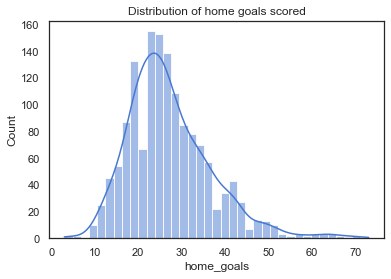

In [21]:
# distribution of home team goals
sns.histplot(home_away['home_goals'], kde=True)
plt.title('Distribution of home goals scored')

The distribution is positively skewed

Text(0.5, 1.0, 'Distribution of away goals scored')

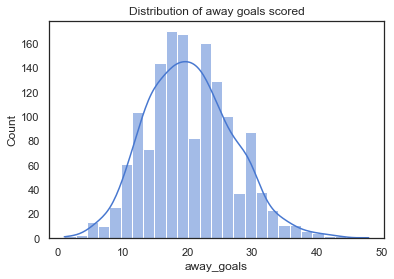

In [22]:
# distribution of away team goals
sns.histplot(home_away['away_goals'], kde=True)
plt.title('Distribution of away goals scored')

The distribution is positively skewed

In [24]:
# total goals scored per season
home_away['total_goals'] = home_away['home_goals'] + home_away['away_goals']

In [25]:
home_away['total_goals'].describe()

count    1467.000000
mean       47.594410
std        10.301845
min         4.000000
25%        41.000000
50%        47.000000
75%        54.000000
max        89.000000
Name: total_goals, dtype: float64

In [26]:
# team that scored the highest goals across all seasons
home_away.query('total_goals == 89')

,country,league,team,season,home_goals,away_goals,total_goals
1040,Spain,Spain LIGA BBVA,Real Madrid CF,2011/2012,70,19,89


`Real Madrid CF` scored a total of `89` goals in 2011/2012, the highest of any team.

In [28]:
# highest number of total goals across all seasons.
home_away.groupby('season')['total_goals'].max()

season
2008/2009    78
2009/2010    82
2010/2011    76
2011/2012    89
2012/2013    88
2013/2014    80
2014/2015    80
2015/2016    86
Name: total_goals, dtype: int64

From the above, we can see that the 2010/2011 is the lowest scoring season.

In [31]:
# For the lowest scoring season, Manchester City and Willem II scored the most.
home_away.query('total_goals == 76')

,country,league,team,season,home_goals,away_goals,total_goals
810,England,England Premier League,Manchester City,2013/2014,63,13,76
1452,Netherlands,Netherlands Eredivisie,Willem II,2010/2011,28,48,76


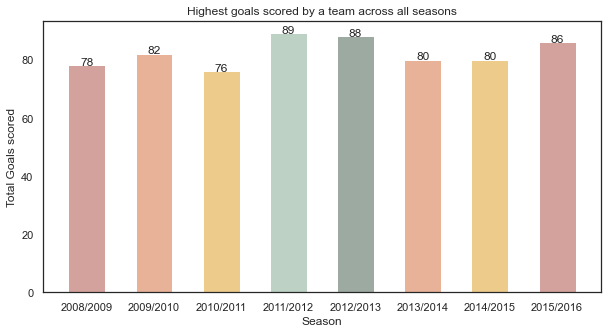

In [34]:
width = 0.55
x = home_away.groupby('season')['total_goals'].max()
fig, ax = plt.subplots( figsize=(10,5))
X = x.index
c = ['#D4A29C', '#E8B298', '#EDCC8B', '#BDD1C5', '#9DAAA2', '#E8B298', '#EDCC8B', '#D4A29C']
ax.set_xlabel('Season')
ax.set_ylabel('Total Goals scored')
ax.set_title('Highest goals scored by a team across all seasons')
pps = ax.bar(x.index, x.values, width, color=c)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2, y=height+.10, s='{}'.format(height), ha='center')

### Lets explore the team goals by season, country and team

In [78]:
total_goals = pd.read_csv('goals_by_team&season.csv', names=['season', 'country', 'team', 'goals'])
total_goals.head()

,season,country,team,goals
0,2011/2012,Spain,FC Barcelona,73
1,2011/2012,Spain,Real Madrid CF,70
2,2015/2016,Spain,Real Madrid CF,70
3,2009/2010,England,Chelsea,68
4,2012/2013,Spain,Real Madrid CF,67


In [79]:
# checking for null values
print('checking for null values')
null = total_goals.isnull().sum().sort_values(ascending=False)
n1 = total_goals.isnull().sum()/total_goals.isnull().count()*100
n2 = (np.round(n1, 1)).sort_values(ascending=False)
missing_val = pd.concat([null, n2], axis=1, keys=['Total', '%'])
missing_val

checking for null values


,Total,%
team,8,0.5
season,0,0.0
country,0,0.0
goals,0,0.0


In [80]:
# drop null values
total_goals.dropna(inplace=True)

In [81]:
# check for duplicates
total_goals.duplicated().sum()

0

In [82]:
total_goals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   1467 non-null   object
 1   country  1467 non-null   object
 2   team     1467 non-null   object
 3   goals    1467 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 57.3+ KB


In [83]:
total_goals.describe()

,goals
count,1467.000000
mean,27.209271
std,9.686024
min,3.000000
25%,21.000000
50%,26.000000
75%,32.000000
max,73.000000


In [84]:
# average goals by season
total_goals.groupby('season')['goals'].mean()

season
2008/2009    26.961538
2009/2010    26.908108
2010/2011    27.336957
2011/2012    27.451087
2012/2013    27.166667
2013/2014    27.511494
2014/2015    26.888298
2015/2016    27.472826
Name: goals, dtype: float64

Text(0.5, 1.0, 'Average goals per season')

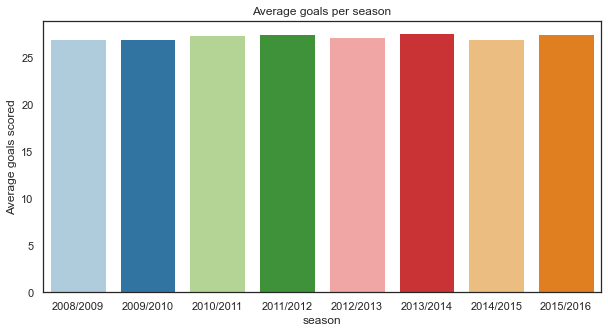

In [85]:
x = total_goals.groupby('season')['goals'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x.index, x.values, palette='Paired')
plt.xlabel('season')
plt.ylabel('Average goals scored')
plt.title('Average goals per season')

In [86]:
# average goals by country
total_goals.groupby('country')['goals'].mean()

country
Belgium        23.808696
England        29.468750
France         26.656250
Germany        27.652778
Italy          28.300000
Netherlands    30.279720
Poland         21.427419
Portugal       22.182540
Scotland       27.156250
Spain          30.993750
Switzerland    29.620253
Name: goals, dtype: float64

Text(0.5, 1.0, 'Average goals per country')

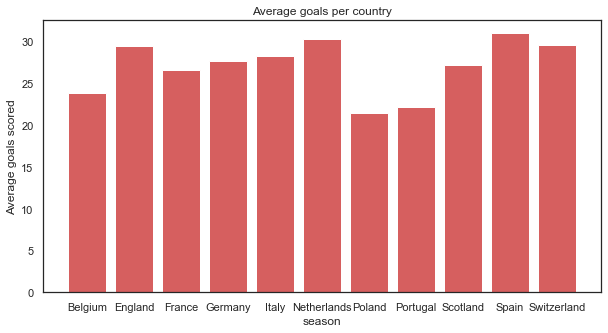

In [87]:
x = total_goals.groupby('country')['goals'].mean()
plt.figure(figsize=(10,5))
plt.bar(x.index, x.values, color='r')
plt.xlabel('season')
plt.ylabel('Average goals scored')
plt.title('Average goals per country')

Highest scoring teams by country per season

In [92]:
print('highest goal scored in 2008/2009 by country = {}'.format(total_goals[total_goals['season'] == '2008/2009']['goals'].max()))
print('highest goal scored in 2010/2011 by country = {}'.format(total_goals[total_goals['season'] == '2010/2011']['goals'].max()))
print('highest goal scored in 2011/2012 by country = {}'.format(total_goals[total_goals['season'] == '2011/2012']['goals'].max()))
print('highest goal scored in 2012/2013 by country = {}'.format(total_goals[total_goals['season'] == '2012/2013']['goals'].max()))
print('highest goal scored in 2013/2014 by country = {}'.format(total_goals[total_goals['season'] == '2013/2014']['goals'].max()))
print('highest goal scored in 2014/2015 by country = {}'.format(total_goals[total_goals['season'] == '2014/2015']['goals'].max()))
print('highest goal scored in 2015/2016 by country = {}'.format(total_goals[total_goals['season'] == '2015/2016']['goals'].max()))

highest goal scored in 2008/2009 by country = 61
highest goal scored in 2010/2011 by country = 61
highest goal scored in 2011/2012 by country = 73
highest goal scored in 2012/2013 by country = 67
highest goal scored in 2013/2014 by country = 64
highest goal scored in 2014/2015 by country = 65
highest goal scored in 2015/2016 by country = 70


In [97]:
# using pandas query to view the countries
total_goals.query('goals == [61,73,67,64,65,70]')

,season,country,team,goals
0,2011/2012,Spain,FC Barcelona,73
1,2011/2012,Spain,Real Madrid CF,70
2,2015/2016,Spain,Real Madrid CF,70
4,2012/2013,Spain,Real Madrid CF,67
5,2015/2016,Spain,FC Barcelona,67
6,2014/2015,Spain,Real Madrid CF,65
7,2009/2010,Netherlands,Ajax,64
8,2013/2014,Spain,FC Barcelona,64
9,2014/2015,Spain,FC Barcelona,64
13,2008/2009,Spain,FC Barcelona,61


Text(0.5, 1.0, 'Highest scoring country across all the seasons')

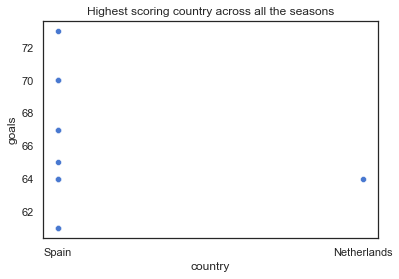

In [110]:
high_scoring= total_goals.query('goals == [61,73,67,64,65,70]')
sns.scatterplot(high_scoring['country'], high_scoring['goals'])
plt.title('Highest scoring country across all the seasons')

Spainish teams scored the most across all the seasons.

### Lets further explore by considering the number of stages played, the number of participating teams per season

In [112]:
stages_df = pd.read_csv('avg&total_goals.csv', names=['country', 'league', 'season', 'no_of_stages', 'no_of_teams',
                                                     'avg_home_goals', 'avg_away_goals', 'avg_goals', 'total_goals'])
stages_df.head()

,country,league,season,no_of_stages,no_of_teams,avg_home_goals,avg_away_goals,avg_goals,total_goals
0,Belgium,Belgium Jupiler League,2008/2009,34,16,1.6307,1.1634,2.7941,855
1,England,England Premier League,2008/2009,38,20,1.4000,1.0789,2.4789,942
2,France,France Ligue 1,2008/2009,38,20,1.2868,0.9711,2.2579,858
3,Germany,Germany 1. Bundesliga,2008/2009,34,18,1.6993,1.2222,2.9216,894
4,Italy,Italy Serie A,2008/2009,38,20,1.5211,1.0789,2.6000,988


Now, lets have an overview of the dataset

In [113]:
print(stages_df.shape)
stages_df.info()

(88, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         88 non-null     object 
 1   league          88 non-null     object 
 2   season          88 non-null     object 
 3   no_of_stages    88 non-null     int64  
 4   no_of_teams     88 non-null     int64  
 5   avg_home_goals  88 non-null     float64
 6   avg_away_goals  88 non-null     float64
 7   avg_goals       88 non-null     float64
 8   total_goals     88 non-null     int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 6.3+ KB


In [114]:
stages_df.describe()

,no_of_stages,no_of_teams,avg_home_goals,avg_away_goals,avg_goals,total_goals
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,34.772727,16.670455,1.543081,1.165868,2.708952,798.715909
std,4.450823,3.590286,0.152944,0.118766,0.243215,213.757245
min,6.000000,4.000000,1.233300,0.845800,2.183300,30.000000
25%,34.000000,15.000000,1.449800,1.081600,2.557225,600.500000
50%,36.000000,18.000000,1.518900,1.160650,2.714450,868.000000
75%,38.000000,20.000000,1.630925,1.240725,2.862400,978.250000
max,38.000000,20.000000,1.994400,1.411800,3.327800,1101.000000


In [115]:
print('checking for null values')
null = stages_df.isnull().sum().sort_values(ascending=False)
n1 = stages_df.isnull().sum()/stages_df.isnull().count()*100
n2 = (np.round(n1, 1)).sort_values(ascending=False)
missing_val = pd.concat([null, n2], axis=1, keys=['Total', '%'])
missing_val

checking for null values


,Total,%
country,0,0.0
league,0,0.0
season,0,0.0
no_of_stages,0,0.0
no_of_teams,0,0.0
avg_home_goals,0,0.0
avg_away_goals,0,0.0
avg_goals,0,0.0
total_goals,0,0.0


In [121]:
# number of participating teams per season
stages_df.groupby('season')['no_of_teams'].sum()

season
2008/2009    182
2009/2010    185
2010/2011    184
2011/2012    184
2012/2013    186
2013/2014    174
2014/2015    188
2015/2016    184
Name: no_of_teams, dtype: int64

The `2014/2015` season had the highest number of participating teams

In [122]:
# average no of stages per season
stages_df.groupby('season')['no_of_stages'].mean()

season
2008/2009    35.272727
2009/2010    34.909091
2010/2011    34.909091
2011/2012    34.909091
2012/2013    34.909091
2013/2014    32.727273
2014/2015    35.272727
2015/2016    35.272727
Name: no_of_stages, dtype: float64

In [123]:
# average goals scored by season
stages_df.groupby('season')['avg_goals'].sum()

season
2008/2009    28.6798
2009/2010    29.5554
2010/2011    29.5740
2011/2012    29.7620
2012/2013    30.4369
2013/2014    30.2006
2014/2015    29.5728
2015/2016    30.6063
Name: avg_goals, dtype: float64

<a id='conclusions'></a>
## Conclusions

So here comes the end of the first project of the Data Analyst Nanodegree program where I put to use the various things I was thought in the data analysis process to extract, clean, wrangle and visualize various datasets. I also made use of SQL for joining various columns and data in order to simplify the datasets. The insights I also got each analysis has been summarized under the  notebook cell. However, I couldn't interpret the dataset available for the players as the given attributes where not clearly explained caused me to skip the players analysis. 